# Primer clustering con scikit-learn

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías y carga de datos de prueba

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn. cluster import KMeans

from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer


In [2]:
x, y, c = make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7, return_centers=True)

In [3]:
x

array([[  1.98897886,  -7.13117099],
       [  3.98353917,  -7.85082013],
       [  1.2068692 ,  -6.28647153],
       ...,
       [ -1.99277631,   4.27244383],
       [  0.27351724,   5.30653756],
       [ -0.62797928, -12.10918056]])

In [4]:
y

array([3, 3, 3, 3, 0, 0, 2, 0, 1, 1, 3, 3, 1, 1, 0, 2, 2, 2, 0, 0, 0, 3,
       2, 1, 0, 1, 2, 3, 0, 3, 0, 0, 1, 2, 3, 0, 1, 2, 1, 2, 2, 0, 1, 3,
       3, 0, 2, 0, 0, 1, 2, 1, 0, 3, 1, 2, 1, 1, 1, 1, 2, 3, 3, 0, 1, 1,
       2, 1, 3, 0, 1, 1, 1, 2, 0, 0, 3, 1, 3, 1, 0, 1, 1, 0, 0, 2, 0, 1,
       0, 1, 1, 0, 1, 3, 0, 3, 0, 2, 2, 2, 3, 3, 1, 1, 3, 3, 0, 2, 1, 2,
       1, 1, 1, 2, 0, 0, 1, 3, 3, 0, 3, 3, 0, 0, 1, 2, 2, 0, 0, 2, 1, 3,
       1, 0, 3, 2, 0, 1, 2, 3, 0, 2, 3, 1, 3, 0, 0, 3, 3, 0, 0, 3, 0, 1,
       2, 2, 2, 0, 2, 0, 2, 1, 2, 3, 3, 0, 3, 3, 3, 2, 3, 1, 0, 3, 1, 0,
       1, 1, 0, 0, 3, 1, 0, 1, 3, 3, 0, 2, 2, 0, 1, 1, 3, 2, 0, 0, 0, 1,
       1, 2, 2, 1, 3, 0, 2, 2, 2, 2, 1, 2, 0, 2, 3, 1, 2, 2, 1, 3, 0, 3,
       3, 3, 3, 1, 3, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 1, 2, 2, 3, 0, 1, 1,
       2, 2, 3, 1, 2, 3, 3, 3, 2, 3, 2, 3, 0, 2, 3, 2, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 2, 0, 3, 2, 1, 3, 0, 0, 3, 0, 0, 2, 1, 2, 0, 1, 3, 1, 2,
       1, 2, 0, 0, 0, 3, 0, 2, 2, 0, 3, 3, 2, 0, 2,

In [5]:
df_blobs = pd.DataFrame({
    'x1': x[:,0], # le pasamos un diccionario al df
    'x2':x[:,1], 
    'y':y
})

In [6]:
print(df_blobs)

           x1         x2  y
0    1.988979  -7.131171  3
1    3.983539  -7.850820  3
2    1.206869  -6.286472  3
3    1.251456  -8.207160  3
4   -8.394337   6.121797  0
..        ...        ... ..
995 -0.881376   3.340687  1
996  9.729666   4.491100  2
997 -1.992776   4.272444  1
998  0.273517   5.306538  1
999 -0.627979 -12.109181  3

[1000 rows x 3 columns]


In [7]:
df_centers = pd.DataFrame({
    'x1': c[:,0], # le pasamos un diccionario al df
    'x2':c[:,1], 
})

## Visualizacion de datos

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


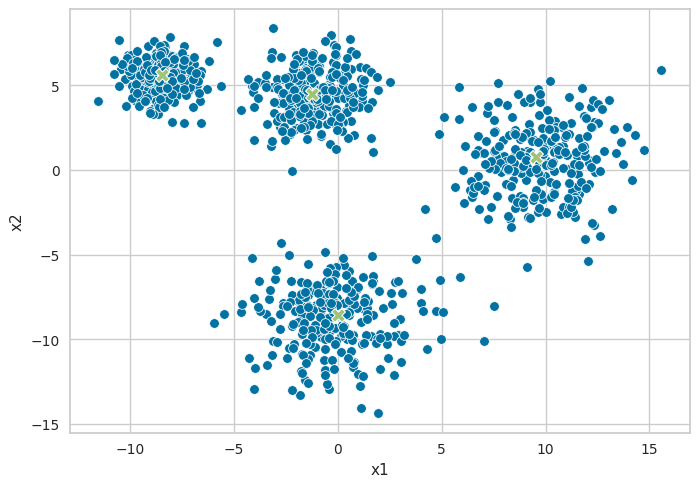

In [8]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.show()


## Aplicando clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=5, random_state=7)

In [11]:
df_cluster = kmeans.fit_predict(x)
df_blobs['cluster'] = df_cluster # se crea nueva columna
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame( #creamos nuevo df
    { # creamos un diccionario
        'x1':k_means_centers[:, 0],
        'x2':k_means_centers[:, 1]
    }
)

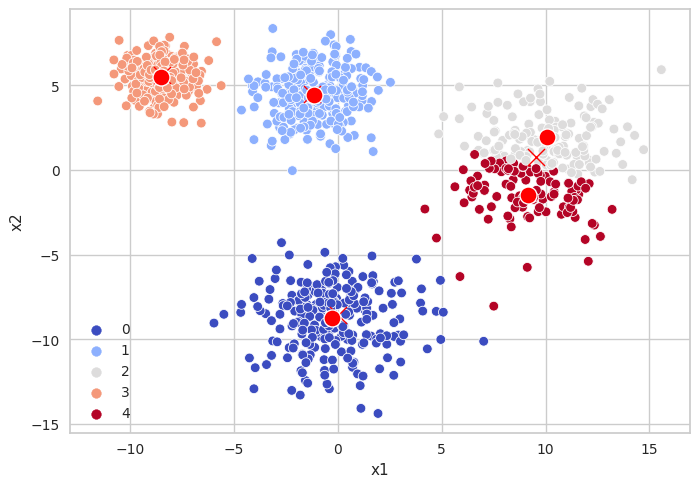

In [12]:
sns.scatterplot(data = df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
sns.scatterplot(data = df_centers, x='x1', y='x2', marker='x', s=150, color='red')
sns.scatterplot(data = df_k_means_center, x='x1', y='x2', marker='o', s=150, color='red')
plt.show()




# Encontrando el K adecuado con grafica de Elbow

In [13]:
def ver_clusters(k):
    kmeans = KMeans(n_clusters=k, random_state=7)
    df_cluster = kmeans.fit_predict(x)
    df_blobs['cluster'] = df_cluster # se crea nueva columna
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame( #creamos nuevo df
        { # creamos un diccionario
            'x1':k_means_centers[:, 0],
            'x2':k_means_centers[:, 1]
        }
    )

3


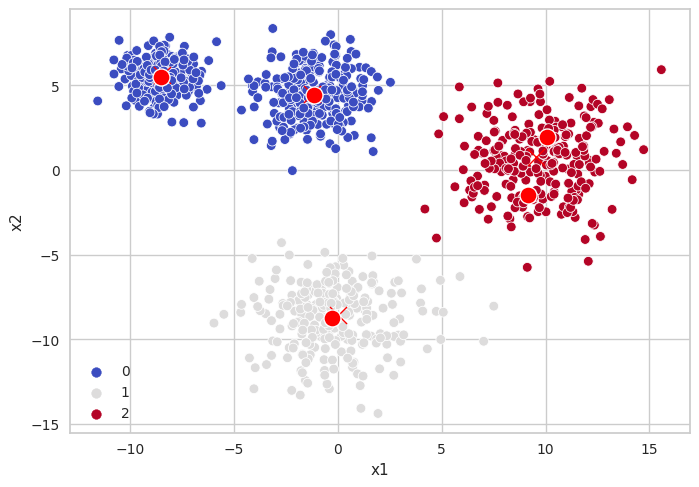

4


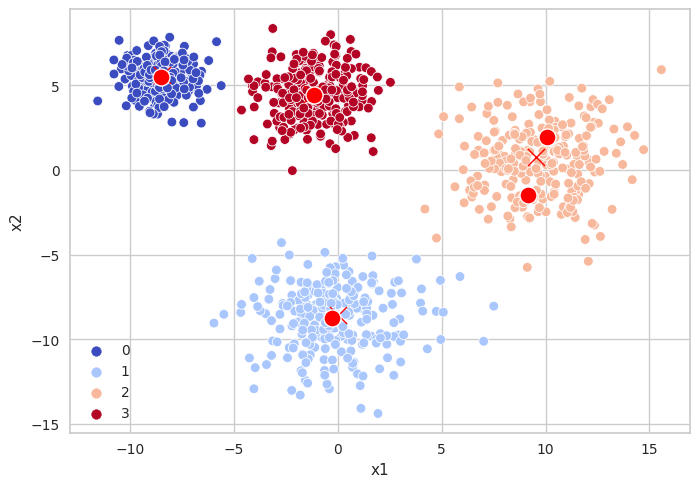

5


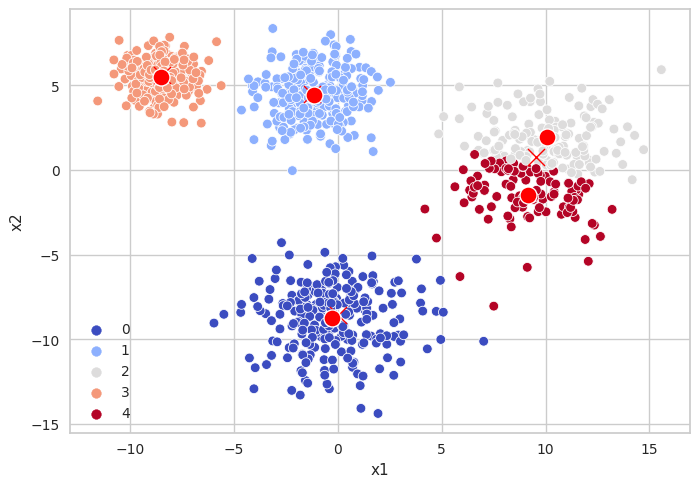

In [14]:
for _ in range(3, 6):
    print(_)
    ver_clusters(_)
    sns.scatterplot(data = df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
    sns.scatterplot(data = df_centers, x='x1', y='x2', marker='x', s=150, color='red')
    sns.scatterplot(data = df_k_means_center, x='x1', y='x2', marker='o', s=150, color='red')
    plt.show()


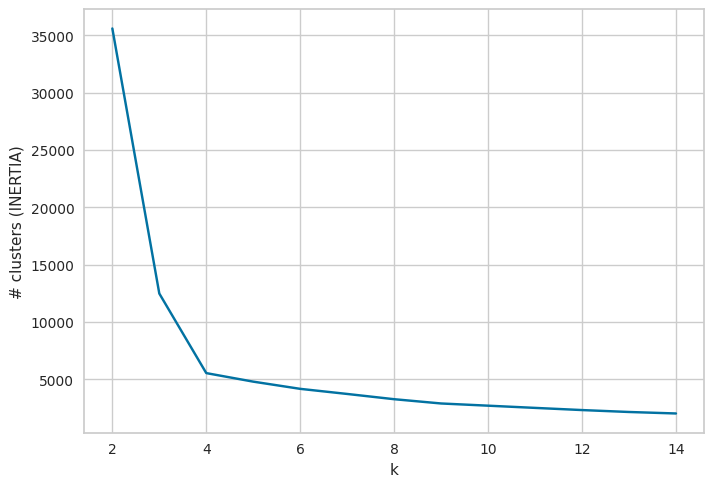

In [15]:
sum_of_squared_distances = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('# clusters (INERTIA)')
plt.show()   

### Silhouette Score

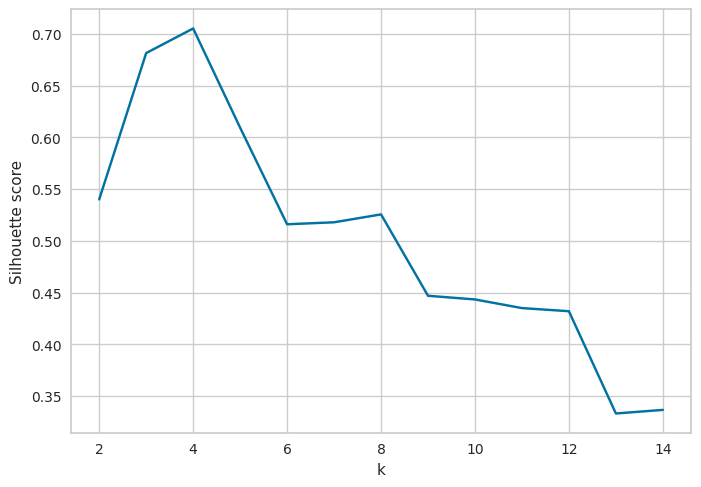

In [16]:
# El punto mas alto nos dice cual es el K mas optimo
silhouette_scores = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    y = km.predict(x)
    silhouette_scores.append(silhouette_score(x, y))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()   

### Evaluar el resultado del clusteringm

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

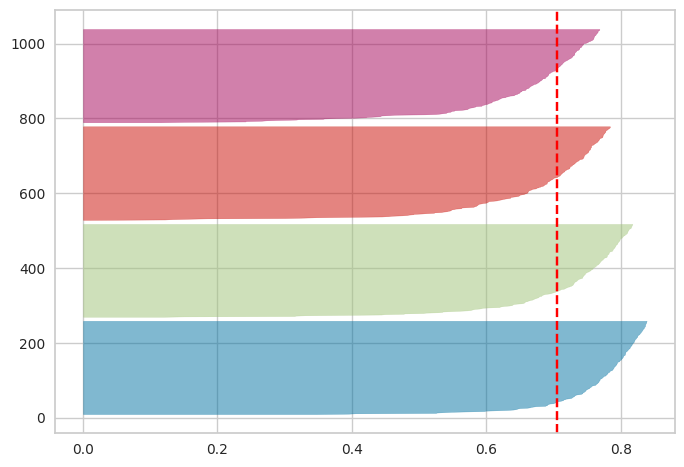

In [19]:
km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick')
visualizer.fit(x)

## Hierarchical clustering (Jerarquico)